# Loading and Cleaning Data

In [3]:
import pandas as pd
import plotly
import plotly.express as px

In [4]:
df = pd.read_excel('/content/ca3c1f5b-5910-4fe7-892b-a06b01a09c5b.xlsx')

In [5]:
df.head()

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details
0,2522007,"Cook Vandergrift, Inc.",Devices,Class II,Ongoing,Worldwide distribution - US Nationwide includi...,Vandergrift,Pennsylvania,United States,2023-09-01,Sterility of device may be compromised due to...,Cook Lead Clipper- An auxiliary tool indicated...,92791,Class II,202599,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
1,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Models BF-1T150, BF...",92779,Class II,202535,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
2,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Models BF-MP160F, B...",92779,Class II,202536,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
3,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Model BF-Q180-AC_x0...",92779,Class II,202537,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
4,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Models BF-1T180, BF...",92779,Class II,202538,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...


In [6]:
df = df[["Event Classification","Reason for Recall"]] #selecting the only important columns for text classification

In [7]:
df.describe() #summary staitics of the dataset

,Event Classification,Reason for Recall
count,2426,2426
unique,3,717
top,Class II,XXX
freq,1924,124


In [8]:
df.duplicated() #finding if there are duplicates in the data

0       False
1       False
2        True
3        True
4        True
        ...  
2421    False
2422     True
2423    False
2424     True
2425    False
Length: 2426, dtype: bool

In [9]:
df.drop_duplicates() #dropping duplicates

,Event Classification,Reason for Recall
0,Class II,Sterility of device may be compromised due to...
1,Class II,Complaint of endoscope model becoming lodged i...
16,Class II,Phoroptor VRx Head may detach from the bracket...
17,Class II,It is possible the upper roller bracket in the...
18,Class I,Users were identifying autofill failure condit...
...,...,...
2419,Class II,Potential for leakage at the catheter hub.
2420,Class II,Drill Pin (drill bit) is not compatible with t...
2421,Class II,The outer sterile package cavity has a corner ...
2423,Class II,The outer label does not match the device insi...


In [10]:
df.isnull() #checking for null values

,Event Classification,Reason for Recall
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2421,False,False
2422,False,False
2423,False,False
2424,False,False


## Exploratory Data Analysis

In [11]:
#creating a new df for visualizations purposes
#Counts all the number of cases for each classifications

df_class = df.groupby("Event Classification").count().reset_index()
df_class.head()

,Event Classification,Reason for Recall
0,Class I,480
1,Class II,1924
2,Class III,22


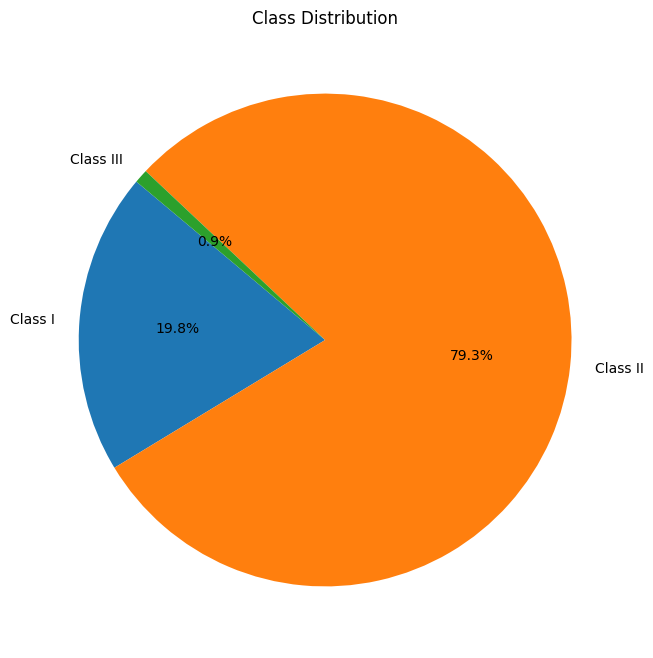

In [12]:
import matplotlib.pyplot as plt

# Extract Event classification as the labels and reason for recall as the counts
class_labels = df_class['Event Classification']
class_counts = df_class['Reason for Recall']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [13]:
# creating a bar chart to shows the distribution between the classes
plt.figure(figsize=(8, 12))
fig = px.bar(df_class, x='Event Classification', y='Reason for Recall')
fig.show()

<Figure size 800x1200 with 0 Axes>

In [14]:
# changing datatype to string, so they can be normalized
df['Reason for Recall'] = df['Reason for Recall'].astype(str)
df['Event Classification'] = df['Event Classification'].astype(str)

In [15]:
# changing all the words to lowercase
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda x: x.lower())

In [16]:
#importing all the required libraries for tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
# tokenizing the feature column
df['Reason for Recall'] = df['Reason for Recall'].apply(regexp.tokenize)
df['Reason for Recall'].head(3)

0    [sterility, of, device, may, be, compromised, ...
1    [complaint, of, endoscope, model, becoming, lo...
2    [complaint, of, endoscope, model, becoming, lo...
Name: Reason for Recall, dtype: object

In [18]:
# importing the libraries needed for stopwords
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
# finding all common stopwords in the dataset
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda x: [word for word in x if word not in stopwords])
df['Reason for Recall'].head(3)

0    [sterility, device, may, compromised, due, bre...
1    [complaint, endoscope, model, becoming, lodged...
2    [complaint, endoscope, model, becoming, lodged...
Name: Reason for Recall, dtype: object

In [20]:
# importing libaries for finding the stem words
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# chanding all the words to their stem words
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda word_list: [porter.stem(word) for word in word_list])
print(df['Reason for Recall'])

0       [steril, devic, may, compromis, due, breach, c...
1       [complaint, endoscop, model, becom, lodg, endo...
2       [complaint, endoscop, model, becom, lodg, endo...
3       [complaint, endoscop, model, becom, lodg, endo...
4       [complaint, endoscop, model, becom, lodg, endo...
                              ...                        
2421    [outer, steril, packag, caviti, corner, wall, ...
2422                     [excess, ultraviolet, c, radiat]
2423    [outer, label, match, devic, insid, packag, af...
2424    [outer, label, match, devic, insid, packag, af...
2425    [devic, may, intermitt, fail, produc, audio, t...
Name: Reason for Recall, Length: 2426, dtype: object


In [22]:
#library for frequency distribution of words in the dataset
from nltk.probability import FreqDist

In [23]:
words = [word for sublist in df['Reason for Recall'] for word in sublist]

# Create FreqDist
fdist = FreqDist(words)

# Check top 5 common words
print(fdist.most_common(5))

[('may', 1114), ('result', 854), ('potenti', 704), ('product', 671), ('steril', 609)]


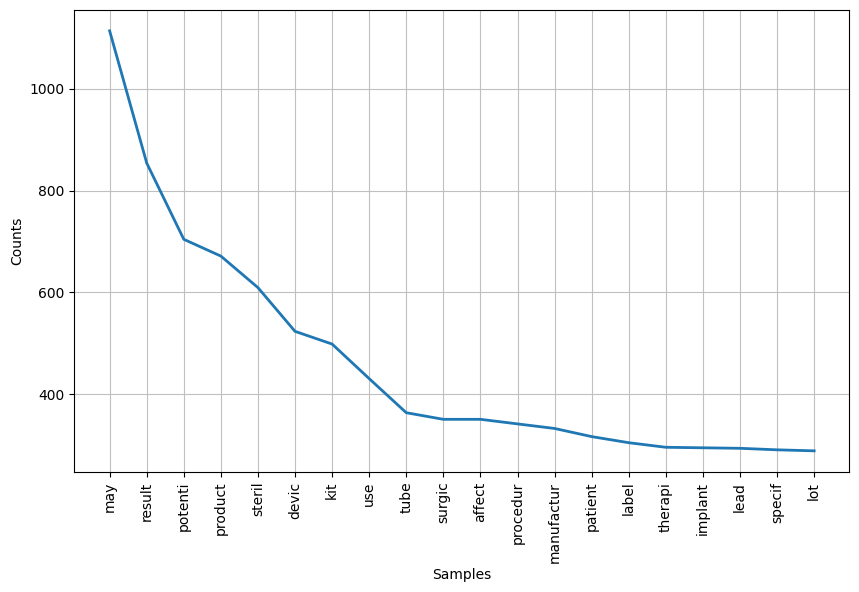

In [24]:
# Import matplotlib
import matplotlib.pyplot as plt

#setting the size of the plot
plt.figure(figsize=(10, 6))

# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

## Data Preprocessing/ Training

In [25]:
# importing required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score

In [26]:
vectorizer = TfidfVectorizer()

In [27]:
#combining tokenized words back into the column
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda word_list: ' '.join(word_list))

In [28]:
# making y equal to the target variable
y = df["Event Classification"]

In [29]:
# transforming feature column into numerical column, so ML models can understand it, and making it equal to X
X = vectorizer.fit_transform(df['Reason for Recall'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
from imblearn.over_sampling import SMOTE # using synthetic samples to increase the minority class to balance distribution

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [31]:
# Splitting the dataste into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes

In [32]:
#importing multinomial Naive Bayes distribution

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [33]:
# prediction of target variable
y_pred= clf.predict(X_test)

In [34]:
# importing required metrics to measure how well the models is foing
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9844155844155844

In [35]:
# calculation of the metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [36]:
#printing out the results of the metrics
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

Precision: 0.9844458223521733
F1 Score: 0.9843689979260525
Recall: 0.9844155844155844


In [37]:
## printing out the summary of how good the model is doing
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class I       0.98      0.99      0.98       365
    Class II       0.99      0.97      0.98       395
   Class III       0.98      1.00      0.99       395

    accuracy                           0.98      1155
   macro avg       0.98      0.98      0.98      1155
weighted avg       0.98      0.98      0.98      1155



In [38]:
# importing required libraries for confusion matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

def confusion_matrix_heatmap(cm: np.ndarray) -> plt.Figure:
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    return fig

#function to for confusion matric heatmap

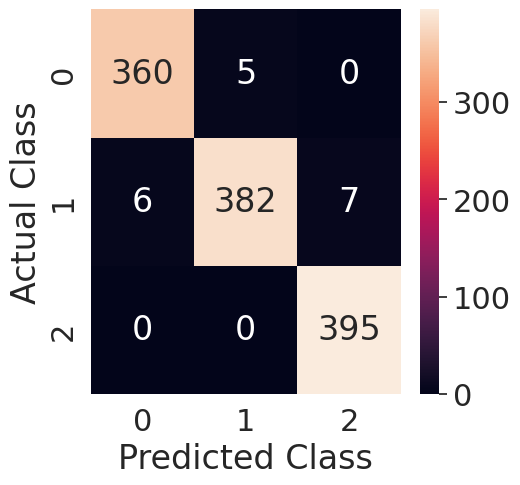

In [39]:
# printing the results for confusion matrix
confusion_matrix_heatmap(confusion_matrix(y_test, y_pred))
pass

# Hyperparameter Tuning for MNB

In [40]:
# Improting Grid Search for hyperparameter tuning to prevent overfitting
from sklearn.model_selection import GridSearchCV

# grid values for hyperparameter tuning
alpha_values = [0.1, 0.5, 1.0, 1.5]

param_grid = {'alpha': alpha_values}

# Using Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_alpha = grid_search.best_params_['alpha']
best_clf = grid_search.best_estimator_

In [41]:
# Evaluating the best Multinomial Naive Bayes model on the test set
# prediction of target variable

y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Alpha:", best_alpha)
print("Accuracy:", accuracy)

Best Alpha: 0.1
Accuracy: 0.9930735930735931


# Random Forest Classifier


In [42]:
# importing random forest model and fitting it to the training data. Also using balanced weight because of the unbalanced dataset we have
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [43]:
# prediction of target variable and printing out the results
y_pred= rf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9948051948051948

In [44]:
# calculation of the metrics
recision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [45]:
#printing out the results of the metrics
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

Precision: 0.9844458223521733
F1 Score: 0.9948095564385365
Recall: 0.9948051948051948


In [46]:
# printing out the summary of how good the model is doing
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class I       0.99      0.99      0.99       365
    Class II       0.99      0.99      0.99       395
   Class III       1.00      0.99      1.00       395

    accuracy                           0.99      1155
   macro avg       0.99      0.99      0.99      1155
weighted avg       0.99      0.99      0.99      1155



In [47]:
# importing require libraries for confusion matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

def confusion_matrix_heatmap(cm: np.ndarray) -> plt.Figure:
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    return fig

#function to print out confusion matric heatmap

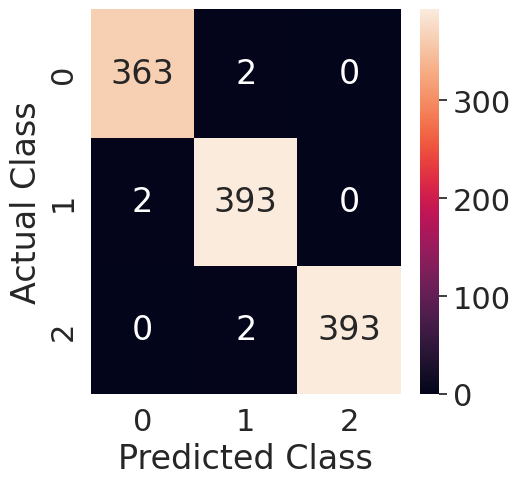

In [48]:
# printing the results for confusion matrix
confusion_matrix_heatmap(confusion_matrix(y_test, y_pred))
pass

# Hyperparameter Tuning for RF

In [49]:
# grid values for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [0, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
 #Using grid search cross validation for picking the best parameters

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [51]:
# fitting the model to the training dataset and the best parameters
best = RandomForestClassifier(**best_params)
best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [52]:
# Evaluating the best random forest model on the test set
# prediction of target variable

y_pred = best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.40%
